<a href="https://colab.research.google.com/github/dibyarupnath/Colour-Identification-In-Images/blob/main/Dibyarup_Nath_Colour_Identification_in_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Projects/The Sparks Foundation/Colour Identification in Images/Files/")

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

Reading the image using imread()

File Type: <class 'numpy.ndarray'>
Shape: (1026, 1017, 3)


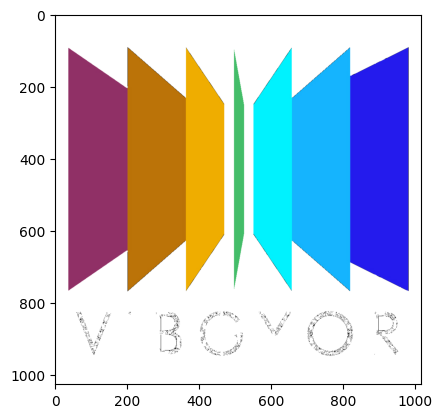

In [ ]:
image = cv2.imread('vibgyor.png')
print("File Type: {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

Since OpenCV read images in Blue-Green-Red (BGR) by default, we must convert it to RGB to get the actual image. We will use cvtColor()

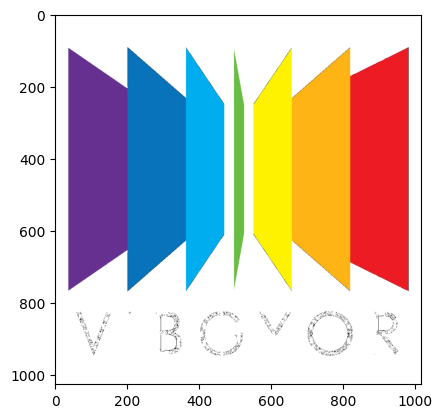

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

We are defining a function that will convert RGB to hex so that we can use those hex codes for our pie chart.

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

The following function helps us generalise the Colour Identifier by putting the code used above to analyse vibgyor.png in a reusable function that can be called on any image.

+ image_path : path of the image whose colour is to be extracted
+ number_of_colors : number of colours to extract
+ show_chart : Boolean => whether or not to show the pie_chart

The return value lists all the colours in the image in RBG format arrays

In [ ]:
def colour_extractor(image_path, number_of_colors, show_chart):
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
  modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
  clf = KMeans(n_clusters = number_of_colors)
  labels = clf.fit_predict(modified_image)

  counts = Counter(labels)

  center_colors = clf.cluster_centers_
  # We get ordered colors by iterating through the keys
  ordered_colors = [center_colors[i] for i in counts.keys()]
  hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
  rgb_colors = [ordered_colors[i] for i in counts.keys()]

  if (show_chart):
      plt.figure(figsize = (8, 6))
      plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

  return rgb_colors

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[array([125.63754571, 178.85879724,  99.53108492]),
 array([253.51213592, 180.25960967,  21.97231028]),
 array([  8.16560926, 114.92492447, 186.62547835]),
 array([235.69940179,  27.03172301,  35.91942355]),
 array([101.69491764,  48.71533155, 143.89365996]),
 array([2.53939335e+02, 2.41979564e+02, 4.36076917e-02]),
 array([  1.28972999, 173.33739805, 238.96856442]),
 array([253.9862793 , 254.02448715, 253.9492721 ])]

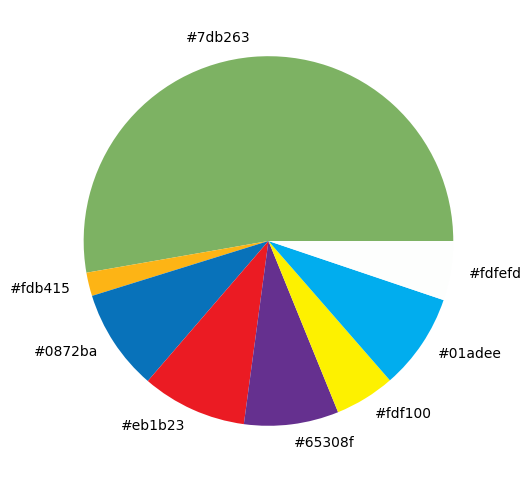

In [ ]:
colour_extractor("vibgyor.png", 8, True)